Import Modules

In [ ]:
import pandas as pd
import numpy as np
import re
import string

Install Spacy

In [ ]:
#! pip install -U pip setuptools wheel
#! pip install -U spacy
#! python -m spacy download en_core_web_sm

Install gensim (A library useful for topic modelling)

In [ ]:
#!pip install gensim

The technique we need to use is called Topic Modelling.

Input: A document-term matrix. Each topic will consist of a set of words where order doesn't matter.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df_balanced = pd.read_pickle("/content/gdrive/My Drive/transport_notes_cleaned_2000")

In [ ]:
df_balanced.drop(['index', 'ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME','STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR'],axis=1,inplace=True)
sentences=df_balanced.TEXT.values
labels = df_balanced.TRANSPORTATION.values
df_balanced.head()

,TEXT,TRANSPORTATION
0,service medicine allergies patient recorded a...,1
1,f service medicine allergies losartan aspirin...,1
2,m service medicine allergies patient recorded...,1
3,m service medicine allergies ampicillin penic...,1
4,m service medicine allergies benzodiazepines ...,1


In [ ]:
df_balanced.head()

,TEXT,TRANSPORTATION
0,service medicine allergies patient recorded a...,1
1,f service medicine allergies losartan aspirin...,1
2,m service medicine allergies patient recorded...,1
3,m service medicine allergies ampicillin penic...,1
4,m service medicine allergies benzodiazepines ...,1


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
#import tensorflow_text as text
import pandas as pd

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['TEXT'],df_balanced['TRANSPORTATION'], stratify=df_balanced['TRANSPORTATION'])

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

FileNotFoundError: ignored

In [ ]:

noteevents_df = pd.read_csv("/content/gdrive/My Drive/NOTEEVENTS.csv.gz")

<ipython-input-6-c708d410adb8>:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  noteevents_df = pd.read_csv("/content/gdrive/My Drive/NOTEEVENTS.csv.gz")


# Checking for transportation notes

In [ ]:
noteevents_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [ ]:
noteevents_df.shape

(2083180, 11)

In [ ]:
print(noteevents_df['TEXT'][5])

Admission Date:  [**2172-3-5**]              Discharge Date:   [**2172-3-8**]

Date of Birth:  [**2109-10-8**]             Sex:   F

Service: NEUROSURGERY

Allergies:
No Known Allergies / Adverse Drug Reactions

Attending:[**First Name3 (LF) 1835**]
Chief Complaint:
Meningioma

Major Surgical or Invasive Procedure:
Right Craniotomy


History of Present Illness:
[**Known firstname 622**] [**Known lastname 1836**] is a 62-year-old woman, with longstanding
history of rheumatoid arthritis, probable Sweet's syndrome, and
multiple joint complications requiring orthopedic interventions.
She was found to hve a right cavernous sinus and nasopharyngeal
mass.  She underwent a biopsy of hte nasopharyngeal mass by Dr.
[**First Name4 (NamePattern1) **] [**Last Name (NamePattern1) 1837**] and the pathology, including flow
cytometry,
was reactive for T-cell lymphoid hyperplasia only.

She has a longstanding history of rheumatoid arthritis that
involved small and large joints in her body.  Her disease 

In [ ]:
lst = [42130]
print(len(noteevents_df[noteevents_df['SUBJECT_ID'].isin(lst)]['TEXT']))
for row in noteevents_df[noteevents_df['SUBJECT_ID'].isin(lst)]['TEXT']:
    print(len(noteevents_df[noteevents_df['SUBJECT_ID'].isin(lst)]['TEXT']))
    print(row)
    print("--------------------------------------------------------------------------------")

9
9
Admission Date:  [**2150-2-25**]              Discharge Date:   [**2150-3-1**]

Date of Birth:  [**2086-12-19**]             Sex:   M

Service: NEUROSURGERY

Allergies:
No Known Allergies / Adverse Drug Reactions

Attending:[**First Name3 (LF) 1835**]
Chief Complaint:
left sided brain lesion

Major Surgical or Invasive Procedure:
[**2-25**] Left Craniotomy for mass resection


History of Present Illness:
[**Known firstname **] [**Known lastname 1852**] is a 62-year-old left-handed man who is here for a
follow up of his left sphenoid meningioma.  I last saw him on
[**2149-11-17**] and his head CT showed growth of the left sphenoid
meningioma.  He is seizure free.  Today, he is here with his
wife
and daughter.  [**Name (NI) **] does not have headache, nausea, vomiting,
urinary incontinence, or fall.

His neurological problem began on [**2142-6-22**] when he became
confused and disoriented in a hotel bathroom.  At that time, he
was visiting his daughter for a wedding.  His wife found 

In [ ]:
transport = [13702,
26880,
28063,
1136,
11369,
20646,
62745,
710,
24424,
82559,
10044,
17483,
9590,
27051,
26175,
82559,
22180,
53181,
53151,
20646,
42130,
79900,
70108,
19631,
26601,
24424,
22663,
1136,
4127,
5239,
13723,
23224]

for val in transport:
    print(str(val) + " " + str(len(noteevents_df[noteevents_df['SUBJECT_ID'] == val]['TEXT'])))

13702 187
26880 39
28063 23
1136 62
11369 66
20646 18
62745 15
710 74
24424 28
82559 58
10044 21
17483 22
9590 81
27051 65
26175 47
82559 58
22180 159
53181 19
53151 16
20646 18
42130 9
79900 55
70108 28
19631 34
26601 154
24424 28
22663 84
1136 62
4127 26
5239 92
13723 30
23224 71


In [ ]:
transport_words = [' taxi ',]
transport_words2 = [' transportation ']
transport_words3 = [' not drive ']
count = 0

In [ ]:
notes_tr = pd.DataFrame()

In [ ]:
for word in transport_words2:
    for i in range(0,2083180):
      if word in noteevents_df['TEXT'][i]:
          notes_tr = notes_tr.append(noteevents_df.iloc[i])



<ipython-input-13-d76fa5d58fde>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  notes_tr = notes_tr.append(noteevents_df.iloc[i])
<ipython-input-13-d76fa5d58fde>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  notes_tr = notes_tr.append(noteevents_df.iloc[i])
<ipython-input-13-d76fa5d58fde>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  notes_tr = notes_tr.append(noteevents_df.iloc[i])
<ipython-input-13-d76fa5d58fde>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  notes_tr = notes_tr.append(noteevents_df.iloc[i])
<ipython-input-13-d76fa5d58fde>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

In [ ]:
notes_tr.shape

(480, 11)

In [ ]:
notes_tr['TRANSPORTATION'] = 1

In [ ]:
notes_tr.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,TRANSPORTATION
48,195,22180,162436.0,2134-03-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2134-2-16**] ...,1
490,500,17977,198062.0,2159-11-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2159-10-24**] ...,1
1581,1546,79061,127004.0,2153-07-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2153-6-16**] ...,1
1673,1314,75733,151447.0,2132-05-23,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2132-5-12**] ...,1
2086,1865,22208,143545.0,2179-03-22,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2179-3-11**] ...,1


In [ ]:
transport_subject_ids = list(notes_tr['SUBJECT_ID'])

22180 not in transport_subject_ids

False

In [ ]:
for i in range(0,10000):
    if noteevents_df.loc[i,'SUBJECT_ID'] not in transport_subject_ids:
        notes_tr = notes_tr.append(noteevents_df.iloc[i])
    if notes_tr.shape[0] == 2000:
      break


<ipython-input-18-0f12f582824a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  notes_tr = notes_tr.append(noteevents_df.iloc[i])
<ipython-input-18-0f12f582824a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  notes_tr = notes_tr.append(noteevents_df.iloc[i])
<ipython-input-18-0f12f582824a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  notes_tr = notes_tr.append(noteevents_df.iloc[i])
<ipython-input-18-0f12f582824a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  notes_tr = notes_tr.append(noteevents_df.iloc[i])
<ipython-input-18-0f12f582824a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

In [ ]:
notes_tr = notes_tr.reset_index()

In [ ]:
notes_tr.at[479,'TRANSPORTATION']

1.0

In [ ]:
for i in range(480,2000):
    notes_tr.at[i,'TRANSPORTATION'] = 0


In [ ]:
notes_tr['TRANSPORTATION'] = notes_tr['TRANSPORTATION'].astype(int)

In [ ]:
notes_tr.to_pickle('transport_notes_unclean_2000')

In [ ]:
for word in transport_words:
    for i in range(0,100000):
        if word in noteevents_df['TEXT'][i]:
            location = noteevents_df['TEXT'][i].find(word)
            print("********")
            print(word + " FOUND")
            print("Subject ID:" + str(noteevents_df['SUBJECT_ID'][i]))
            print("********")
            print(noteevents_df['TEXT'][i][location-80:location+100])
            print("-------------------------------")

********
 taxi  FOUND
Subject ID:20204
********
CKD, Baseline Cr (1.4-2.4)

Social History:
Patient previously was employed as a taxi cab driver and
additionally worked on the rairoad, reportedly in a grain
elevator. The patient
-------------------------------
********
 taxi  FOUND
Subject ID:51155
********

under hypothermic circulatory arrest.


History of Present Illness:
59-year old taxi driver from [**Location (un) **], with bicuspid aortic
valve disease, manifesting as severe st
-------------------------------
********
 taxi  FOUND
Subject ID:8509
********
who awoke the morning of [**2-17**] with blood on her hands, reportedly called a taxi cab,
but sounded confused on the telephone, and therefore the cab
called 911.  The patient was
-------------------------------
********
 taxi  FOUND
Subject ID:26118
********
ohol. She has trouble getting to her appointments
here as she has no car and the taxi from [**Location (un) 686**] is quite
expensive.  Her husband passed away several ye

In [ ]:
subject_id = [000000]


# Dataset Structure


Structure of the csv file

In [ ]:
noteevents_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [ ]:
#df = pd.read_pickle("mimic_cleaned")

FileNotFoundError: ignored

In [ ]:
df = noteevents_df[:2000]

In [ ]:
#df.to_pickle("mimic_cleaned_2k")

In [ ]:
#from google.colab import files
#files.download('mimic_cleaned_2000')

Shape of the dataset - there are 2.08 million notes.

In [ ]:
noteevents_df.shape

(2083180, 11)

In [ ]:
noteevents_df = notes_tr

In [ ]:
noteevents_df.head()

,index,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,TRANSPORTATION
0,48,195,22180,162436.0,2134-03-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2134-2-16**] ...,1
1,490,500,17977,198062.0,2159-11-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2159-10-24**] ...,1
2,1581,1546,79061,127004.0,2153-07-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2153-6-16**] ...,1
3,1673,1314,75733,151447.0,2132-05-23,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2132-5-12**] ...,1
4,2086,1865,22208,143545.0,2179-03-22,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2179-3-11**] ...,1


# **Data Cleaning**

The goal is to clean the data. So let's look at 10 random notes

In [ ]:
for i in range(0,10):
  print(noteevents_df['TEXT'].iloc[i])
  print("-------------------------------------------------------------------")

Admission Date:  [**2134-2-16**]              Discharge Date:   [**2134-3-9**]


Service: MEDICINE

Allergies:
Patient recorded as having No Known Allergies to Drugs

Attending:[**First Name3 (LF) 759**]
Chief Complaint:
syncope

Major Surgical or Invasive Procedure:
R humeral ORIF
Cervical laminectomy


History of Present Illness:
This is a 81 year old Russian speaking only woman brought from
home after a syncopal episode on day of admission. Through
Russian interpreter, patient states that she had an episode of
chest pain and shortness of breath after lunch and then thinks
she passed out. Patient woke up with a forehead laceration and
right forearm swelling.
.
In ED, GCS 15, AOx4, FS 130. Patient denied chest pain or
shortness of breath. EKG showed coarse afib vs atach with 2:1
block without no acute ischemic changes. Head CT was negative
for intracranial hemorrhage and no new c-spine fracture on
C-spine. Hip films show no definite fracture. Right arm x-ray
negative for fracture. CTA

It seems like there is a lot of text in double brackets []. Let's try to remove these first.

In [ ]:
print(noteevents_df['TEXT'].iloc[0])

Admission Date:  [**2134-2-16**]              Discharge Date:   [**2134-3-9**]


Service: MEDICINE

Allergies:
Patient recorded as having No Known Allergies to Drugs

Attending:[**First Name3 (LF) 759**]
Chief Complaint:
syncope

Major Surgical or Invasive Procedure:
R humeral ORIF
Cervical laminectomy


History of Present Illness:
This is a 81 year old Russian speaking only woman brought from
home after a syncopal episode on day of admission. Through
Russian interpreter, patient states that she had an episode of
chest pain and shortness of breath after lunch and then thinks
she passed out. Patient woke up with a forehead laceration and
right forearm swelling.
.
In ED, GCS 15, AOx4, FS 130. Patient denied chest pain or
shortness of breath. EKG showed coarse afib vs atach with 2:1
block without no acute ischemic changes. Head CT was negative
for intracranial hemorrhage and no new c-spine fracture on
C-spine. Hip films show no definite fracture. Right arm x-ray
negative for fracture. CTA

In [ ]:
noteevents_c1 = noteevents_df.copy() # creating a copy dataframe

In [ ]:
for i in range(0,no_of_records):
    noteevents_c1['TEXT'].iloc[i] = re.sub(r"\[[^\[\]\v]+\]","",noteevents_df['TEXT'].iloc[i])

<ipython-input-62-4f3ebc904db0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noteevents_c1['TEXT'].iloc[i] = re.sub(r"\[[^\[\]\v]+\]","",noteevents_df['TEXT'].iloc[i])


In [ ]:
print(noteevents_c1['TEXT'].iloc[0])

Admission Date:                Discharge Date:   


Service: MEDICINE

Allergies:
Patient recorded as having No Known Allergies to Drugs

Attending:
Chief Complaint:
syncope

Major Surgical or Invasive Procedure:
R humeral ORIF
Cervical laminectomy


History of Present Illness:
This is a 81 year old Russian speaking only woman brought from
home after a syncopal episode on day of admission. Through
Russian interpreter, patient states that she had an episode of
chest pain and shortness of breath after lunch and then thinks
she passed out. Patient woke up with a forehead laceration and
right forearm swelling.
.
In ED, GCS 15, AOx4, FS 130. Patient denied chest pain or
shortness of breath. EKG showed coarse afib vs atach with 2:1
block without no acute ischemic changes. Head CT was negative
for intracranial hemorrhage and no new c-spine fracture on
C-spine. Hip films show no definite fracture. Right arm x-ray
negative for fracture. CTA to rule out PE in setting CP and
syncope.  was consult

We might also need to remove some headings such as:
Admission Date,
Discharge Date,
Addendum,
Date of Birth,

In [ ]:
noteevents_c15 = noteevents_c1.copy()

In [ ]:
remove_words = ['Admission Date:','Discharge Date:','Date of Birth:','Sex:','D:','T:','JOB#']

for i in range(0,no_of_records):
      for word in remove_words:
        if word in noteevents_c15['TEXT'].iloc[i]:
          noteevents_c15['TEXT'].iloc[i] = re.sub(word,'',noteevents_c15['TEXT'].iloc[i])

<ipython-input-65-cad9c0d66357>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noteevents_c15['TEXT'].iloc[i] = re.sub(word,'',noteevents_c15['TEXT'].iloc[i])


In [ ]:
print(noteevents_c15['TEXT'].iloc[1])

                   

                  F

Service: MEDICINE

Allergies:
Losartan / Aspirin / Lisinopril-Hctz

Attending:
Chief Complaint:
pain in left shoulder

Major Surgical or Invasive Procedure:
left shoulder hemiarthroplasty 


History of Present Illness:
69 yo somalian woman with 6week old left hyumerous fx  intial
presented 4weeks out from presumed injury while being transfered
to stretcher for dialysis came in to  mc for shunt eval
fistogram showed left humerous fx because of left arm shunt dr
 felt that the only way could fix the  humerous would
jepodize the shunt  the patiebt who need the hemodaylisas access
switch to the rt side

Past Medical History:
1. Type 2 diabetes
2. Diabetic nephropathy
3. Status post left femur fracture
4. Hyponatremia
5. Hypercholesterolemia
6. Unsteady gait
7. Cataracts
8. Back pain
9. Hypertension
10. Anemia of chronic disease

Social History:
Lives with son who is very involved and well informed regarding
her care needs. Non smoker. No EtOH


Fam

Now that we have found a way to remove the double brackets, let's start with some standard data cleaning processes using spacy. Begining with turning all text to **lower case**.

In [ ]:
noteevents_c2 = noteevents_c15.copy()

In [ ]:
for i in range(0,no_of_records):
    noteevents_c2['TEXT'].iloc[i] = noteevents_c15['TEXT'].iloc[i].lower()

<ipython-input-68-e8ed6b512987>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noteevents_c2['TEXT'].iloc[i] = noteevents_c15['TEXT'].iloc[i].lower()


In [ ]:
print(noteevents_c2['TEXT'].iloc[0])

                   


service: medicine

allergies:
patient recorded as having no known allergies to drugs

attending:
chief complaint:
syncope

major surgical or invasive procedure:
r humeral orif
cervical laminectomy


history of present illness:
this is a 81 year old russian speaking only woman brought from
home after a syncopal episode on day of admission. through
russian interpreter, patient states that she had an episode of
chest pain and shortness of breath after lunch and then thinks
she passed out. patient woke up with a forehead laceration and
right forearm swelling.
.
in ed, gcs 15, aox4, fs 130. patient denied chest pain or
shortness of breath. ekg showed coarse afib vs atach with 2:1
block without no acute ischemic changes. head ct was negative
for intracranial hemorrhage and no new c-spine fracture on
c-spine. hip films show no definite fracture. right arm x-ray
negative for fracture. cta to rule out pe in setting cp and
syncope.  was consulted. patient rec'd iv morphine 

We can try to **remove new lines, punctuation, numbers & unicode characters** now.

In [ ]:
noteevents_c3 = noteevents_c2.copy()

In [ ]:
for i in range(0,no_of_records):
    temp = noteevents_c2['TEXT'].iloc[i].translate(str.maketrans('', '', string.punctuation))
    temp = re.sub(r"\n", " ", temp)
    noteevents_c3['TEXT'].iloc[i] = re.sub(r"[0-9]", "", temp)

<ipython-input-71-f43f69346278>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noteevents_c3['TEXT'].iloc[i] = re.sub(r"[0-9]", "", temp)


In [ ]:
print(noteevents_c3['TEXT'].iloc[1])

                                       f  service medicine  allergies losartan  aspirin  lisinoprilhctz  attending chief complaint pain in left shoulder  major surgical or invasive procedure left shoulder hemiarthroplasty    history of present illness  yo somalian woman with week old left hyumerous fx  intial presented weeks out from presumed injury while being transfered to stretcher for dialysis came in to  mc for shunt eval fistogram showed left humerous fx because of left arm shunt dr  felt that the only way could fix the  humerous would jepodize the shunt  the patiebt who need the hemodaylisas access switch to the rt side  past medical history  type  diabetes  diabetic nephropathy  status post left femur fracture  hyponatremia  hypercholesterolemia  unsteady gait  cataracts  back pain  hypertension  anemia of chronic disease  social history lives with son who is very involved and well informed regarding her care needs non smoker no etoh   family history noncontributory  physical e

One more step me can do is replace every instance of multiple space with a single space

In [ ]:
noteevents_c4 = noteevents_c3.copy()

In [ ]:
for i in range(0,no_of_records):
    noteevents_c4['TEXT'].iloc[i] = re.sub(' +',' ',noteevents_c3['TEXT'].iloc[i])

<ipython-input-74-ec5a09c86eff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noteevents_c4['TEXT'].iloc[i] = re.sub(' +',' ',noteevents_c3['TEXT'].iloc[i])


In [ ]:
print(noteevents_c4['TEXT'].iloc[i])

 f service omed allergies patient recorded as having no known allergies to drugs attending chief complaint confusion nausea vomiting headache major surgical or invasive procedure ventriculostomy ventriculoperitoneal shunt placement intrathecal vancomycin history of present illness f transferred from hospital for evaluation of multiple brain lesions pt had been well until approx month prior to admission when she travelled to via and patient states that she first noticed problem when it felt odd when my children touched my left leg denied pain pins and needles loss of bladderbowel control following one week in the pt began to have lbp no prior hx pain was over the spine at l level wo radiation several days later the pt developed severe headache w nausea and vomiting on return to the us she noted confusion mostly in regards to getting lost and forgetting what she was doing presented to hospital where she was noted to have multiple brain lesions on ct lung mass liver mass bony lesions tran

Let's now pickle this file

In [ ]:
noteevents_c4.to_pickle('transport_notes_cleaned_2000')

In [ ]:
abc = pd.read_pickle('transport_notes_cleaned_2000')

In [ ]:
abc.tail()

,index,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,TRANSPORTATION
1995,1538,1503,14565,145485.0,2164-09-06,NaN,NaN,Discharge summary,Report,NaN,NaN,f service medicine allergies penicillins eryt...,0
1996,1539,1504,7015,178415.0,2192-07-09,NaN,NaN,Discharge summary,Report,NaN,NaN,f service b medicine history of present illne...,0
1997,1540,1505,23023,141702.0,2142-02-09,NaN,NaN,Discharge summary,Report,NaN,NaN,f service cardiothoracic surgery history of p...,0
1998,1541,1506,23023,169061.0,2142-02-27,NaN,NaN,Discharge summary,Report,NaN,NaN,f service me admitting diagnosis cellulitis h...,0
1999,1542,1507,8405,111170.0,2103-09-26,NaN,NaN,Discharge summary,Report,NaN,NaN,f service omed allergies patient recorded as ...,0


In [ ]:
notes_tr.loc[0,'TEXT']

'Admission Date:  [**2134-2-16**]              Discharge Date:   [**2134-3-9**]\n\n\nService: MEDICINE\n\nAllergies:\nPatient recorded as having No Known Allergies to Drugs\n\nAttending:[**First Name3 (LF) 759**]\nChief Complaint:\nsyncope\n\nMajor Surgical or Invasive Procedure:\nR humeral ORIF\nCervical laminectomy\n\n\nHistory of Present Illness:\nThis is a 81 year old Russian speaking only woman brought from\nhome after a syncopal episode on day of admission. Through\nRussian interpreter, patient states that she had an episode of\nchest pain and shortness of breath after lunch and then thinks\nshe passed out. Patient woke up with a forehead laceration and\nright forearm swelling.\n.\nIn ED, GCS 15, AOx4, FS 130. Patient denied chest pain or\nshortness of breath. EKG showed coarse afib vs atach with 2:1\nblock without no acute ischemic changes. Head CT was negative\nfor intracranial hemorrhage and no new c-spine fracture on\nC-spine. Hip films show no definite fracture. Right arm x-

In [ ]:
notes_tr.head()

,index,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,TRANSPORTATION
0,48,195,22180,162436.0,2134-03-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2134-2-16**] ...,1
1,490,500,17977,198062.0,2159-11-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2159-10-24**] ...,1
2,1581,1546,79061,127004.0,2153-07-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2153-6-16**] ...,1
3,1673,1314,75733,151447.0,2132-05-23,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2132-5-12**] ...,1
4,2086,1865,22208,143545.0,2179-03-22,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2179-3-11**] ...,1


In [ ]:
abc.head()

,index,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,TRANSPORTATION
0,48,195,22180,162436.0,2134-03-09,NaN,NaN,Discharge summary,Report,NaN,NaN,service medicine allergies patient recorded a...,1
1,490,500,17977,198062.0,2159-11-10,NaN,NaN,Discharge summary,Report,NaN,NaN,f service medicine allergies losartan aspirin...,1
2,1581,1546,79061,127004.0,2153-07-28,NaN,NaN,Discharge summary,Report,NaN,NaN,m service medicine allergies patient recorded...,1
3,1673,1314,75733,151447.0,2132-05-23,NaN,NaN,Discharge summary,Report,NaN,NaN,m service medicine allergies ampicillin penic...,1
4,2086,1865,22208,143545.0,2179-03-22,NaN,NaN,Discharge summary,Report,NaN,NaN,m service medicine allergies benzodiazepines ...,1


# Trying BERT Binary Classification

In [ ]:
       !pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.2 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
abc = pd.read_pickle("/content/gdrive/My Drive/transport_notes_cleaned_2000")

In [ ]:
df = abc.copy()

In [ ]:
df.columns

Index(['index', 'ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT',
       'TRANSPORTATION'],
      dtype='object')

In [ ]:
df.drop(['index', 'ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME','STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR'],axis=1,inplace=True)
sentences=df.TEXT.values
labels = df.TRANSPORTATION.values
df.head()

,TEXT,TRANSPORTATION
0,service medicine allergies patient recorded a...,1
1,f service medicine allergies losartan aspirin...,1
2,m service medicine allergies patient recorded...,1
3,m service medicine allergies ampicillin penic...,1
4,m service medicine allergies benzodiazepines ...,1


In [ ]:
df.head()

,TEXT,TRANSPORTATION
0,service medicine allergies patient recorded a...,1
1,f service medicine allergies losartan aspirin...,1
2,m service medicine allergies patient recorded...,1
3,m service medicine allergies ampicillin penic...,1
4,m service medicine allergies benzodiazepines ...,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['TEXT'],
                                                      df['TRANSPORTATION'], test_size=0.25, shuffle=True, random_state=42)

In [ ]:
X_train_Transformer, X_val_Transformer, y_train_Transformer, y_val_Transformer = train_test_split(
                                                    x_train, y_train, test_size=0.20, random_state=42)

In [ ]:
model_name = 'bert-base-uncased'
SEQ_LEN = 200
batch_size = 4
epochs = 5
learning_rate = 1e-5 # Controls how large a step is taken when updating model weights during training.
steps_per_epoch = 50
num_workers = 3

In [ ]:
def get_split(text1):
    '''Get split of the text with 200 char lenght'''
    l_total = []
    l_parcial = []
    if len(text1.split())//150 >0:
        n = len(text1.split())//150
    else:
        n = 1
    for w in range(n):
        if w == 0:
            l_parcial = text1.split()[:200]
            l_total.append(" ".join(l_parcial))
        else:
            l_parcial = text1.split()[w*150:w*150 + 200]
            l_total.append(" ".join(l_parcial))
    return str(l_total)

# Splits train and validation sets to be feed to the transformer which only accepts 512 tokens maximum
split_train_text = [get_split(t) for t in X_train_Transformer]
split_valid_text = [get_split(t) for t in X_val_Transformer]
split_test_text = [get_split(t) for t in x_test]

In [ ]:
len(split_test_text)

500

In [ ]:
# Load the RoBERTa tokenizer and tokenize the data
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
trencoding = tokenizer.batch_encode_plus(
  list(split_train_text),
  max_length=SEQ_LEN,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=True,
  truncation=True,
  padding='longest',
  return_attention_mask=True,
)

valencoding = tokenizer.batch_encode_plus(
  list(split_valid_text),
  max_length=SEQ_LEN,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=True,
  truncation=True,
  padding='longest',
  return_attention_mask=True,
)


testencoding = tokenizer.batch_encode_plus(
  list(split_test_text),
  max_length=SEQ_LEN,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=True,
  truncation=True,
  padding='longest',
  return_attention_mask=True,
)

In [ ]:
tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [ ]:
len(trencoding)

3

In [ ]:
trencoding.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
# Check device
# Get the GPU device name if available.
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available. {}'.format(torch.cuda.device_count()))
    print('We will use the GPU: {}'.format(torch.cuda.get_device_name(0)))

# If we dont have GPU but a CPU, training will take place on CPU instead
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

torch.cuda.empty_cache()

There are %d GPU(s) available. 1
We will use the GPU: Tesla T4


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from torch import nn, optim
#compute the class weights
class_wts = compute_class_weight('balanced', classes = np.unique(df['TRANSPORTATION'].values.tolist()),
                                 y= df['TRANSPORTATION'])

#print(class_wts)

# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
#cross_entropy  = nn.NLLLoss(weight=weights)
cross_entropy  = nn.CrossEntropyLoss(weight=weights)

In [ ]:
from torch.utils.data import Dataset, DataLoader, TensorDataset, RandomSampler, SequentialSampler

In [ ]:
def loadData(prep_df, batch_size, num_workers, sampler):

    return  DataLoader(
            prep_df,
            batch_size=batch_size,
            num_workers=num_workers,
            sampler=sampler,
            pin_memory=True
        )

## convert lists to tensors
train_seq = torch.tensor(trencoding['input_ids'])
train_mask = torch.tensor(trencoding['attention_mask'])
train_token_ids = torch.tensor(trencoding['token_type_ids'])
train_y = torch.tensor(y_train_Transformer.tolist())

val_seq = torch.tensor(valencoding['input_ids'])
val_mask = torch.tensor(valencoding['attention_mask'])
val_token_ids = torch.tensor(valencoding['token_type_ids'])
val_y = torch.tensor(y_val_Transformer.tolist())

test_seq = torch.tensor(testencoding['input_ids'])
test_mask = torch.tensor(testencoding['attention_mask'])
test_token_ids = torch.tensor(testencoding['token_type_ids'])
test_y = torch.tensor(y_test.tolist())

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_token_ids, train_y)
# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)
# Train Data Loader
traindata = loadData(train_data, batch_size, num_workers, train_sampler)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_token_ids, val_y)
# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)
# Val Data Loader
valdata = loadData(val_data, batch_size, num_workers, val_sampler)

# wrap tensors
test_data = TensorDataset(test_seq, test_mask, test_token_ids, test_y)
# sampler for sampling the data during training
test_sampler = SequentialSampler(test_data)
# Val Data Loader
testdata = loadData(test_data, batch_size, num_workers, test_sampler)


print('Number of data in the train set', len(traindata))
print('Number of data in the validation set', len(valdata))
print('Number of data in the test set', len(testdata))

Number of data in the train set 300
Number of data in the validation set 75
Number of data in the test set 125


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
len(train_data)

1200

In [ ]:
batch_size

4

In [ ]:
from transformers import BertModel, AutoModel, AdamW, get_linear_schedule_with_warmup, BertTokenizer, BertForSequenceClassification
import random, time
import torch
from babel.dates import format_date, format_datetime, format_time

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, n_classes, freeze_bert=False):

        super(BERT_Arch,self).__init__()
        # Instantiating BERT model object
        self.bert = BertModel.from_pretrained(model_name, return_dict=False)

        # Freeze bert layers
        if freeze_bert:
            for p in self.bert.parameters():
                p.requires_grad = False

        self.bert_drop_1 = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, self.bert.config.hidden_size) # (768, 64)
        self.bn = nn.BatchNorm1d(768) # (768)
        self.bert_drop_2 = nn.Dropout(0.25)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes) # (768,2)


    def forward(self, input_ids, attention_mask, token_type_ids):
        _, output = self.bert(
            input_ids = input_ids,
            attention_mask = attention_mask,
            token_type_ids = token_type_ids
        )
        output = self.bert_drop_1(output)
        output = self.fc(output)
        output = self.bn(output)
        output = self.bert_drop_2(output)
        output = self.out(output)
        return output

In [ ]:
class_names = np.unique(df['TRANSPORTATION'])
print('Downloading the BERT custom model...')
model = BERT_Arch(len(class_names))
model.to(device) # Model to GPU.

#optimizer parameters
param_optimizer = list(model.named_parameters())
no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
optimizer_parameters = [{'params': [p for n, p in param_optimizer
                                    if not any(nd in n for nd in no_decay)],'weight_decay':0.001},
                        {'params': [p for n, p in param_optimizer
                                    if any(nd in n for nd in no_decay)],'weight_decay':0.0}]

print('Preparing the optimizer...')
#optimizer
optimizer = AdamW(optimizer_parameters, lr=learning_rate)
steps = steps_per_epoch
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,
    num_training_steps = steps
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Preparing the optimizer...


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# function to train the bert model
def trainBERT():

    print('Training...')
    model.train()
    total_loss, total_accuracy = 0, 0

    # empty list to save model predictions
    total_preds=[]

    # iterate over batches
    for step, batch in enumerate(traindata):

        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(traindata)))

        if torch.cuda.is_available():
            # push the batch to gpu
            batch = [r.to(device) for r in batch]

        sent_id, mask, token_type_ids, labels = batch
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch
        preds = model(sent_id, mask, token_type_ids)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # add on to the total loss
        total_loss = total_loss + loss.item()
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()
        # append the model predictions
        total_preds.append(preds)

        torch.cuda.empty_cache()

    # compute the training loss of the epoch
    avg_loss = total_loss / len(traindata)

    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():

    print("\nEvaluating...")
    t0 = time.time()

    model.eval() # deactivate dropout layers
    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step, batch in enumerate(valdata):
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(valdata)))

        if torch.cuda.is_available():
            # push the batch to gpu
            batch = [t.to(device) for t in batch]

        sent_id, mask, token_type_ids, labels = batch

        # deactivate autograd
        with torch.no_grad(): # Dont store any previous computations, thus freeing GPU space
            # model predictions
            preds = model(sent_id, mask, token_type_ids)
            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)
            total_loss = total_loss + loss.item()
            preds = preds.detach().cpu().numpy()
            total_preds.append(preds)

        torch.cuda.empty_cache()
    # compute the validation loss of the epoch
    avg_loss = total_loss / len(valdata)
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# Empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

# for each epoch perform training and evaluation
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = trainBERT()

    #evaluate model
    valid_loss, _ = evaluate()

    print('Evaluation done for epoch {}'.format(epoch + 1))
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        print('Saving model...')
        torch.save(model.state_dict(), 'bert_weights.pt') # Save model weight's (you can also save it in .bin format)

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 5
Training...
  Batch    50  of    300.
  Batch   100  of    300.
  Batch   150  of    300.
  Batch   200  of    300.
  Batch   250  of    300.

Evaluating...
  Batch    50  of     75.
Evaluation done for epoch 1
Saving model...

Training Loss: 0.571
Validation Loss: 0.283

 Epoch 2 / 5
Training...
  Batch    50  of    300.
  Batch   100  of    300.
  Batch   150  of    300.
  Batch   200  of    300.
  Batch   250  of    300.

Evaluating...
  Batch    50  of     75.
Evaluation done for epoch 2

Training Loss: 0.541
Validation Loss: 0.307

 Epoch 3 / 5
Training...
  Batch    50  of    300.
  Batch   100  of    300.
  Batch   150  of    300.
  Batch   200  of    300.
  Batch   250  of    300.

Evaluating...
  Batch    50  of     75.
Evaluation done for epoch 3
Saving model...

Training Loss: 0.500
Validation Loss: 0.240

 Epoch 4 / 5
Training...
  Batch    50  of    300.
  Batch   100  of    300.
  Batch   150  of    300.
  Batch   200  of    300.
  Batch   250  of    300.

E

In [ ]:
print('\nTest Set...')

test_preds = []

print('Total batches:', len(testdata))

for fold_index in range(0, 3):

    print('\nFold Model', fold_index)

    # Load the fold model
    path_model = 'bert_weights.pt'
    model.load_state_dict(torch.load(path_model))

    # Send the model to the GPU
    model.to(device)

    stacked_val_labels = []

    # Put the model in evaluation mode.
    model.eval()

    # Turn off the gradient calculations.
    # This tells the model not to compute or store gradients.
    # This step saves memory and speeds up validation.
    torch.set_grad_enabled(False)


    # Reset the total loss for this epoch.
    total_val_loss = 0

    for j, test_batch in enumerate(testdata):

        inference_status = 'Batch ' + str(j + 1)

        print(inference_status, end='\r')

        b_input_ids = test_batch[0].to(device)
        b_input_mask = test_batch[1].to(device)
        b_token_type_ids = test_batch[2].to(device)
        b_test_y = test_batch[3].to(device)


        outputs = model(b_input_ids,
                        attention_mask=b_input_mask,
                        token_type_ids=b_token_type_ids)

        # Get the preds
        preds = outputs[0]

        # Move preds to the CPU
        val_preds = preds.detach().cpu().numpy()

        #true_labels.append(b_test_y.to('cpu').numpy().flatten())

        # Stack the predictions.
        if j == 0:  # first batch
            stacked_val_preds = val_preds

        else:
            stacked_val_preds = np.vstack((stacked_val_preds, val_preds))

    test_preds.append(stacked_val_preds)


print('\nPrediction complete.')



Test Set...
Total batches: 63

Fold Model 0

Fold Model 1

Fold Model 2
Batch 63
Prediction complete.


In [ ]:
print(len(test_preds))
print(test_preds[:5])

3
[array([[ 0.8948825 , -1.3504918 ],
       [ 1.3529142 , -1.4633007 ],
       [ 1.5280883 , -1.7305616 ],
       [ 1.4936465 , -1.7151994 ],
       [ 1.3541193 , -1.4461148 ],
       [-5.309102  ,  5.6628733 ],
       [ 1.636339  , -1.6566788 ],
       [ 1.3111279 , -1.5246879 ],
       [ 1.50427   , -1.5727816 ],
       [ 1.112481  , -1.569441  ],
       [ 1.283105  , -1.4148666 ],
       [-6.1476126 ,  6.514102  ],
       [ 0.5807774 , -1.1449265 ],
       [-6.125718  ,  6.3003583 ],
       [ 1.6936517 , -1.6817417 ],
       [ 1.4004931 , -1.6457486 ],
       [ 1.2806392 , -1.4336793 ],
       [ 1.5079962 , -1.5207405 ],
       [ 1.4760221 , -1.707727  ],
       [ 1.6738911 , -1.7385653 ],
       [ 1.772129  , -1.6414304 ],
       [-5.6270943 ,  6.082078  ],
       [ 1.4588138 , -1.4000964 ],
       [ 1.3121017 , -1.4706827 ],
       [ 1.3956842 , -1.6199251 ],
       [ 1.4407921 , -1.6098115 ],
       [ 0.59117955, -1.108874  ],
       [ 1.2038165 , -1.5148747 ],
       [ 1.398332

In [ ]:
# Sum the predictions of all fold models
for i, item in enumerate(test_preds):
    if i == 0:
        preds = item
    else:
        # Sum the matrices
        preds = item + preds

# Average the predictions
avg_preds = preds/(len(test_preds))

#print(preds)
#print()
#print(avg_preds)

# Take the argmax.
# This returns the column index of the max value in each row.
test_predictions = np.argmax(avg_preds, axis=1)

# Take a look of the output
print(type(test_predictions))
print(len(test_predictions))
print()
print(test_predictions)

<class 'numpy.ndarray'>
63

[0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0]


In [ ]:
true_y = []
for j, test_batch in enumerate(testdata):
    true_y.append(int(test_batch[3][0].numpy().flatten()))
print(true_y)

[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

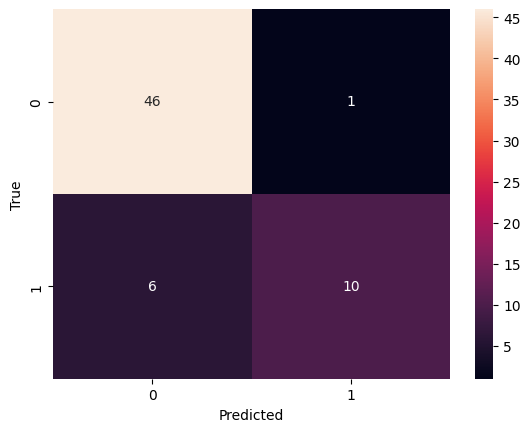

In [ ]:
# Accuracy and classification report
target_names = ['true_y', 'predicted_y']

data = {'true_y': true_y,
       'predicted_y': test_predictions}

df_pred_BERT = pd.DataFrame(data, columns=['true_y','predicted_y'])

confusion_matrix = pd.crosstab(df_pred_BERT['true_y'], df_pred_BERT['predicted_y'], rownames=['True'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
print('Accuracy of BERT model', accuracy_score(true_y, test_predictions))

Accuracy of BERT model 0.8888888888888888


In [ ]:
len(true_y)

63